# Exercises for Lecture 4 (Performance analysis)

In [8]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2021-01-26 11:13:36


In [6]:
# Common imports
import os
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) # To make this notebook's output stable across runs

In [7]:
# Fetch MNIST dataset
import requests  
  
url = "https://drive.google.com/uc?export=download&id=1_DqI-pH7gV5RuWxQ4IT1U7PrmSLLhc2a"
mnist = requests.get(url)
with open('mnist.npz', 'wb') as f:
    f.write(mnist.content)

In [9]:
mnist = np.load('mnist.npz')
X_train, y_train = mnist['x_train'], mnist['y_train']
X_test, y_test = mnist['x_test'], mnist['y_test']

y_train.shape, y_test.shape, X_train.shape, X_test.shape

((60000,), (10000,), (60000, 28, 28), (10000, 28, 28))

Reshape X_train and X_test to a 2D array

In [10]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

## Exercise 1 : Compute number of examples of each digit.

In [24]:
y_train[y_train ==1].shape

(6742,)

In [26]:
n_digits = 10
for i in range (n_digits):
    print(i,y_train[y_train ==i].shape[0])

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


In [27]:
# 标准答案
n_digits = 10
for i in range (n_digits):
    print(i,X_train[np.where(y_train == i)].shape[0])

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


## Exercise 2: Construct target train and test vectors for 8 classifier.

In [39]:
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)
print(y_train_8,y_test_8)

[False False False ... False False  True] [False False False ... False False False]


## Exercise 3: Use Scikit-Learn to perform 3-fold cross validation using [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [43]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=10);
sgd_clf.fit(X_train, y_train_8)

C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=10, random_state=42)

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_8,cv=3,scoring="accuracy")

C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.8955, 0.9178, 0.936 ])

## Exercise 4: Compute the confusion matrix

In [46]:
# 先predict
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)
# 用混淆矩阵比对
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train_8, y_train_pred)
conf_matrix

C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[52054,  2095],
       [ 2919,  2932]], dtype=int64)

## Exercise 5: Compute the precision and recall for the confusion matrix `conf_matrix` computed above.

Compute by hand and then using Scikit-Learn [precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score).

In [53]:
from sklearn.metrics import precision_score,recall_score
tn=conf_matrix[0,0]
fp=conf_matrix[0,1]
fn=conf_matrix[1,0]
tp=conf_matrix[1,1]
recall = tp/(tp+fn)
precision = tp/(tp+fp)
print(precision,recall)
print(precision_score(y_train_8, y_train_pred))
print(recall_score(y_train_8, y_train_pred))

0.5832504475830516 0.5011109212100495
0.5832504475830516
0.5011109212100495


## Exercise 6: Compute the $F_1$ score for the confusion matrix `conf_matrix` computed above.

Compute by hand and then using Scikit-Learn [f1_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

In [56]:
F1 = 2*precision*recall/(precision+recall)
from sklearn.metrics import f1_score
print(F1,f1_score(y_train_8, y_train_pred))

0.5390696819268248 0.5390696819268248


## Exercise 7: Compute the false positive rate for the confusion matrix `conf_matrix` computed above.

In [57]:
false_positive = fp/(fp+tn)
false_positive

0.03868954181979353

## Exercise 8: Where is the ideal point in the ROC curve domain?

左上角

Idea point is FPR = 0 and TPR = 1, i.e. top left coner

Dashed line corresponds to random classifier. 虚线对应随机分类器。

Again, there is a trade-off. As the threshold is reduced to increase the true positive rate,we get a larger false positive rate.  需要权衡。随着阈值的降低来增加真阳性率，我们得到一个更大的假阳性率。

C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


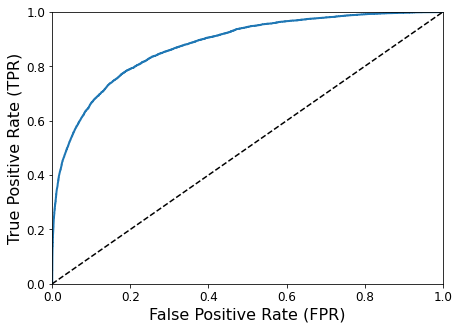

In [59]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3,
                             method="decision_function")
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(7, 5))
plot_roc_curve(fpr, tpr)

##  Exercise 9: What is the AUC(area under the ROC curve) for an ideal and random classifier?

Consider the confusion matrix for multiclass classification.

The area under the idea curve: 1. Get the total square area.


The area under random classifier curve: Under 0.5. Half of the area.

In [60]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\msi\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[5363,    1,   39,   40,   40,   92,   53,    7,  279,    9],
       [   1, 6491,   13,   30,    8,   30,   11,    4,  135,   19],
       [  30,  250, 4518,  280,  105,   44,  109,   63,  538,   21],
       [  21,   33,   90, 5301,   22,  223,   27,   34,  317,   63],
       [  18,   12,   32,   17, 5223,    9,   37,   10,  302,  182],
       [  59,   49,   38,  357,  137, 3744,   93,   23,  841,   80],
       [  21,   19,   57,   10,   80,  221, 5400,    9,  100,    1],
       [  24,   32,   30,   55,  150,   12,    2, 5438,  190,  332],
       [  22,  163,   30,  154,   57,  101,   29,   13, 5239,   43],
       [  20,   19,   20,   79,  462,   31,    1,  184,  604, 4529]],
      dtype=int64)

## Exercise 10: Convert confusion matrix to probabilities and plot.

In [66]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

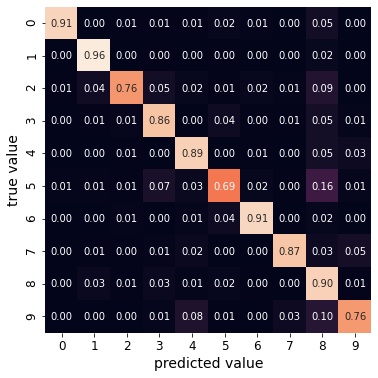

In [67]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(norm_conf_mx, square=True, annot=True, cbar=False, fmt='.2f')
plt.xlabel('predicted value')
plt.ylabel('true value');